## Homework 4
Hi everyone this is your fourth homework.

In this exercise, You will deal with **SVM**, **Decision Tree**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

# Support Vector Machine (SVM)

**A Support Vector Machine (SVM)** is a supervised machine learning algorithm that can be used for both classification and regression tasks. The primary objective of SVM is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies data points into different classes.

Here are some key concepts associated with SVM:

**Hyperplane:**

In a two-dimensional space, a hyperplane is a line that separates the data into different classes. In higher-dimensional spaces, it becomes a hyperplane.

**Support Vectors:**

Support Vectors are the data points that are closest to the decision boundary (hyperplane) and have a significant influence on its position. These points play a crucial role in defining the optimal hyperplane.

**Margin:**

The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin because a larger margin generally leads to better generalization performance.

**Kernel Trick:**

SVMs can handle non-linear decision boundaries by using a technique called the kernel trick.

**C Parameter:**

SVM has a parameter denoted as 'C,' which controls the trade-off between having a smooth decision boundary and classifying training points correctly. A smaller C value makes the decision boundary smoother, while a larger C value may lead to a more accurate classification of training points.

**Linear and Non-linear SVM:**

SVMs can be applied with linear and non-linear kernels. Linear SVM is suitable for linearly separable data, while non-linear SVM with kernels like Polynomial or Radial Basis Function (RBF) can handle more complex, non-linear relationships.

##<font color="red">**Question 1**</font>
In this question you are going to work with the iris dataset.
This dataset contains 3 classes, each of which has 50 members, and each class refers to a type of lily flower. Each element contains information about the length and width of the sepal and the length and width of the petal. Also, the data is labeled and its class is also known. You can refer to this [link](https://archive.ics.uci.edu/dataset/53/iris) for more details.


- First, separate the data using the linear kernel and express the correlation matrix of the recall, precision, and F1 score values.

To do this on the iris dataset, first take the first two features of all the data and then classify using the linear kernel. At the end, display the data graph with the labels of the corresponding classes as well as the separating lines of each class

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

At first, we load iris dataset and take just two first features as predictors:

In [31]:
# Your Code:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking the first two features
y = iris.target

Now we initialize the SVM model with linear kernel and train the model:

In [32]:
# Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

SVC(kernel='linear')

Time for prediction! Using predicted data, we compute confusion matrix. Our model predicted all instances of class 0 correctly. But there are some mis-predictions in class 1 and 2. Some of exmaples in class 1 classifed as class 2 and vice versa.

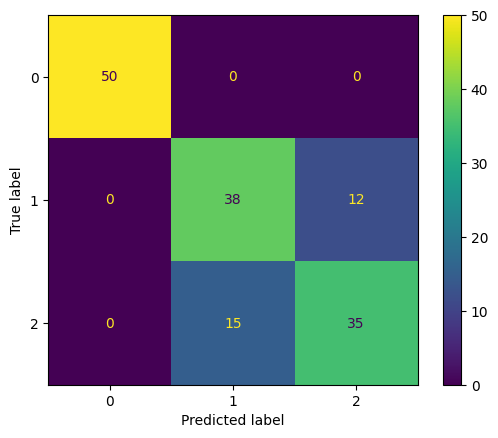

In [33]:
# Prediction
y_pred = svm_model.predict(X)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot()

Now we can evaluate our model! According to these metrics, our model has acceptable performance:

In [34]:
# Calculate precision, recall, and F1 score
precision = precision_score(y, y_pred, average="macro")
recall = recall_score(y, y_pred, average="macro")
f1 = f1_score(y, y_pred, average='macro')
print("*** Evaluation Metrics ***")
print("precision: ", precision)
print("recall: ", recall)
print("f1-score: ", f1)

*** Evaluation Metrics ***
precision:  0.8205539943797672
recall:  0.82
f1-score:  0.8198378540686617


In the following plot, you can see SVM decision boundaries and points belong to each class. It is obvious that it is not possible to distinguish all points of these two classes (brown and yellow) from each other:

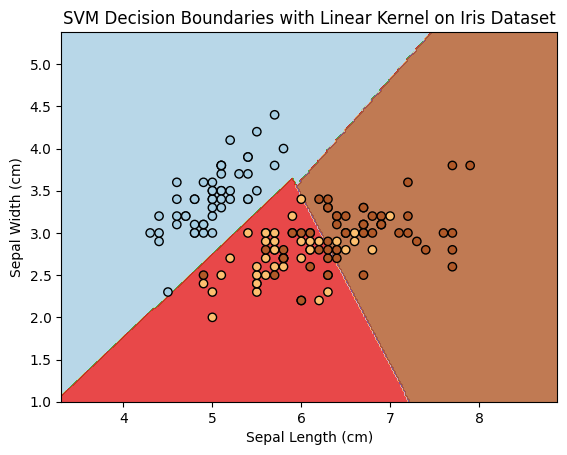

In [35]:
# Plot the decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points with labels
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries with Linear Kernel on Iris Dataset')
plt.show()

- Research about polynomial, linear, and rbf kernels and state which datasets each one is suitable for classification. Apply the classification to the items in the previous section and analyze the results.

<font color="green">**Answer:**</font>

### 1. Polynomial Kernel:

- **Equation:** $K(x, y) = (x \cdot y + c)^d$
- **Suitability:**
  - **Dataset Characteristics:**
    - Suitable for datasets with non-linear decision boundaries.
    - Effective in capturing interactions between features.
  - **Examples:**
    - Image recognition where pixel relationships matter.
    - Biological data with complex dependencies.

### 2. Linear Kernel:

- **Equation:** $K(x, y) = x \cdot y$
- **Suitability:**
  - **Dataset Characteristics:**
    - Suitable for linearly separable datasets.
    - Fast and computationally efficient for high-dimensional data.
  - **Examples:**
    - Text classification tasks.
    - Simple datasets with well-defined linear boundaries.

### 3. Radial Basis Function (RBF) Kernel:

- **Equation:** $K(x, y) = \exp\left(-\frac{{\lVert x - y \rVert^2}}{{2\sigma^2}}\right)$
- **Suitability:**
  - **Dataset Characteristics:**
    - Suitable for datasets with complex, non-linear patterns.
    - Effective in capturing local and global relationships.
  - **Examples:**
    - Financial data with non-linear dependencies.
    - Bioinformatics datasets with intricate relationships.

### Considerations:

1. **Data Size:**
   - Polynomial kernels can be computationally expensive, especially at higher degrees, making them less suitable for large datasets.
   - Linear kernels are efficient and scale well with the number of samples.
   - RBF kernels might be computationally demanding for very large datasets.

2. **Overfitting:**
   - Higher degrees in polynomial kernels can lead to overfitting, so careful tuning is essential.
   - Linear kernels are less prone to overfitting but may underperform on complex data.
   - RBF kernels can be prone to overfitting, especially with small $\sigma$ values.

3. **Parameter Tuning:**
   - Polynomial kernels require tuning parameters like degree and a constant term.
   - RBF kernels require tuning the width parameter.
   - Linear kernels are parameter-free.

At first, we start with polynomial kernel:

In [36]:
# Train the SVM model with a poly kernel
svm_model = SVC(kernel='poly')
svm_model.fit(X, y)

SVC(kernel='poly')

Based on confusion matrix values, we have same conditions like the model with linear kernel:

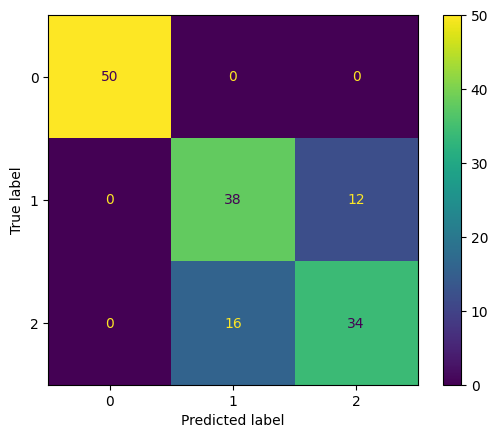

In [37]:
# Prediction
y_pred = svm_model.predict(X)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot()

Based on evaluation metrcis, the performance of these two models, model with linear kernel and model with ploynomial kernel, does not have special difference but the model with linear kernel was slightly better:

In [38]:
# Calculate precision, recall, and F1 score
precision = precision_score(y, y_pred, average="macro")
recall = recall_score(y, y_pred, average="macro")
f1 = f1_score(y, y_pred, average='macro')
print("*** Evaluation Metrics ***")
print("precision: ", precision)
print("recall: ", recall)
print("f1-score: ", f1)

*** Evaluation Metrics ***
precision:  0.8142780461621042
recall:  0.8133333333333334
f1-score:  0.8130341880341881


Unlike the previous model, our boundaries are not linear in this case:

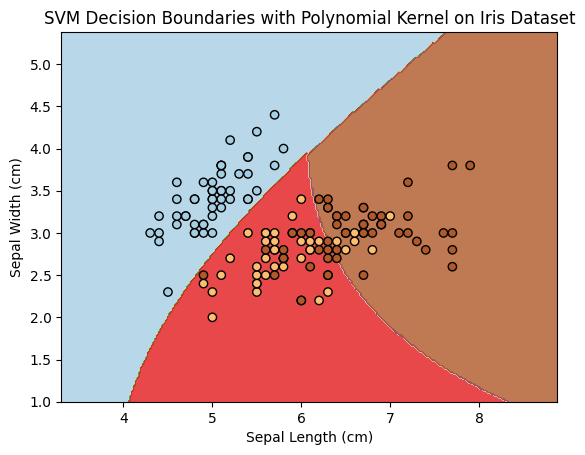

In [39]:
# Plot the decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points with labels
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries with Polynomial Kernel on Iris Dataset')
plt.show()

Now we try RBF kernel:

In [40]:
# Train the SVM model with a RBF kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X, y)

SVC()

Our confusion matrix is just like linear case!

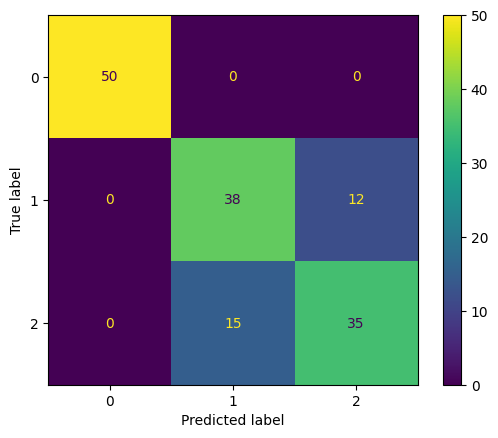

In [41]:
# Prediction
y_pred = svm_model.predict(X)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot()

Also our evaluation metrics are just like linear case again!

In [42]:
# Calculate precision, recall, and F1 score
precision = precision_score(y, y_pred, average="macro")
recall = recall_score(y, y_pred, average="macro")
f1 = f1_score(y, y_pred, average='macro')
print("*** Evaluation Metrics ***")
print("precision: ", precision)
print("recall: ", recall)
print("f1-score: ", f1)

*** Evaluation Metrics ***
precision:  0.8205539943797672
recall:  0.82
f1-score:  0.8198378540686617


Here we see some curve in decision boundaries!

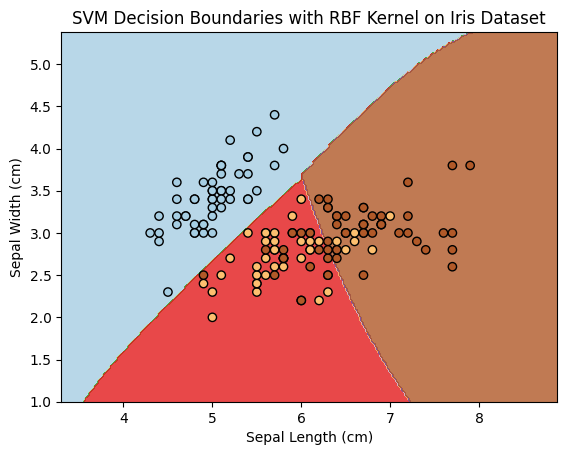

In [43]:
# Plot the decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points with labels
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundaries with RBF Kernel on Iris Dataset')
plt.show()

- Research regularization, Gamm a hyperparameters. Change each of the hyperparameters 3 times and repeat the classification for each. Analyze the effect of each hyperparameter on the classification.

### 1. C Parameter:

- **Role:**
  - The C parameter controls the regularization strength in SVMs.
  - It balances the desire to achieve a low training error with the goal of keeping the decision boundary smooth and preventing overfitting.

- **Effect:**
  - Small C values encourage a broader margin and a simpler decision boundary, which might result in some training misclassifications.
  - Large C values penalize misclassifications more heavily, leading to a tighter decision boundary that fits the training data more closely.

### 2. γ (Gamma) Parameter:

- **Role:**
  - The γ (gamma) parameter determines the influence of a single training example, affecting the shape of the decision boundary.
  - It defines how far the influence of a single training example reaches.

- **Effect:**
  - Small γ values result in a broader influence, leading to a smoother decision boundary.
  - Large γ values make the decision boundary more influenced by individual training samples, potentially resulting in a more complex and non-linear decision boundary.

### Relationship between C and γ:

- **Inverse Relationship:**
  - There is an inverse relationship between C and γ. Increasing C tends to make the decision boundary more sensitive to individual data points, while increasing γ makes the decision boundary smoother.

If we set low values for C and Gamma, we expect to have more regularization so we might have not so good performance on training set but strong generalization ability on test set. On the other hand, high values for these parameters reduce the effect of regularization, so we will have high perforamce on training set but we might have poor performance on test set.

The results are based on what we said! For low values, the performance on the training set is not promising but on the test set, the results are much better! The best performance on the test set is for these values:


*   C=0.1 / gamma=1.0
*   C=1.0 / gamma=0.1
*   C=1.0 / gamma=1.0

As we expected, the best performance on training set happens when we have high values for C and Gamma. In this scenario, it happens when both of them have 10 as their value

In [44]:
# Your Code:
# Function to train SVM model with different hyperparameters
def train_and_evaluate(C_value, gamma_value, X_train, y_train, X_test):
    svm_model = SVC(C=C_value, gamma=gamma_value)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_train)
    y_pred_test = svm_model.predict(X_test)
    return y_pred, y_pred_test

# Evaluate SVM models with different hyperparameters
C_values = [0.1, 1.0, 10.0]
gamma_values = [0.1, 1.0, 10.0]

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for C_value in C_values:
    for gamma_value in gamma_values:
        train, test = train_and_evaluate(C_value, gamma_value, X_train, y_train, X_test)
        # Regularization parameters
        print(f'C={C_value}, gamma={gamma_value}:')

        # Train scores
        precision = precision_score(y_train, train, average="macro")
        recall = recall_score(y_train, train, average="macro")
        f1 = f1_score(y_train, train, average='macro')
        acc = accuracy_score(y_train, train)
        print("precision(Train): ", precision)
        print("recall(Train): ", recall)
        print("f1-score(Train): ", f1)
        print("accuracy(Train): ", acc)
        print("--------------")
        # Test score
        precision = precision_score(y_test, test, average="macro")
        recall = recall_score(y_test, test, average="macro")
        f1 = f1_score(y_test, test, average='macro')
        acc = accuracy_score(y_test, test)
        print("precision(Test): ", precision)
        print("recall(Test): ", recall)
        print("f1-score(Test): ", f1)
        print("accuracy(Test): ", acc)
        print("////////////////////")



C=0.1, gamma=0.1:
precision(Train):  0.5041666666666667
recall(Train):  0.6666666666666666
f1-score(Train):  0.559228650137741
accuracy(Train):  0.675
--------------
precision(Test):  0.8245614035087719
recall(Test):  0.6969696969696969
f1-score(Test):  0.6031746031746031
accuracy(Test):  0.6666666666666666
////////////////////
C=0.1, gamma=1.0:
precision(Train):  0.7932651321398124
recall(Train):  0.7904940587867418
f1-score(Train):  0.7900593082454206
accuracy(Train):  0.7916666666666666
--------------
precision(Test):  0.9027777777777778
recall(Test):  0.8956228956228957
f1-score(Test):  0.8976982097186701
accuracy(Test):  0.9
////////////////////
C=0.1, gamma=10.0:
precision(Train):  0.4979919678714859
recall(Train):  0.6416666666666667
f1-score(Train):  0.540776427873202
accuracy(Train):  0.65
--------------
precision(Test):  0.4761904761904762
recall(Test):  0.6333333333333333
f1-score(Test):  0.5157894736842105
accuracy(Test):  0.6
////////////////////
C=1.0, gamma=0.1:
precisio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Calculate the best parameters of the previous part with the help of grid search and repeat the classification for the kernels you checked in the third part and analyze the results.

It seems that the best model has polynomial kernel with C=0.1 and gamma=10.0. The f1-score on this setting is 0.83:

In [45]:
# Your Code:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM classifier
svm_model = SVC()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X, y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best parameters to train the final model
best_svm_model = SVC(**best_params)
best_svm_model.fit(X, y)

# Predict on the test set
y_pred = best_svm_model.predict(X)

# Calculate accuracy and f1-score
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='macro')
print(f'Accuracy with Best Hyperparameters: {accuracy}')
print(f'F1-score with Best Hyperparameters: {f1}')


Best Hyperparameters: {'C': 0.1, 'gamma': 10.0, 'kernel': 'poly'}
Accuracy with Best Hyperparameters: 0.8333333333333334
F1-score with Best Hyperparameters: 0.8333166649998333


#SVM Regression

**Support Vector Machine (SVM) regression**, also known as Support Vector Regression (SVR), is a type of machine learning algorithm that is used for regression tasks. While traditional SVMs are designed for classification, SVR extends the concept to predict continuous values, making it suitable for regression problems where the goal is to predict a numeric output rather than class labels. The primary idea behind SVM regression is to find a hyperplane that best represents the relationship between the input features and the continuous target variable


##<font color="red">**Question 2**</font>

In this question, we want to solve an SVR problem with the help of the attached data set of people's income based on their job position. This data set contains three columns, in the first column their job position is described, in the second column is the work rank, and in the third column is the amount of income. In this question, with the help of three kernels **rbf, linear and polynomial**, predict the income of people and display the estimated and actual values in a graph.

Import **Data.csv** as a dataset for this question.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [47]:
data = pd.read_csv("Data.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


We use Level as predictor and and Salary is the target variable:

In [48]:
# Separate features (Level) and target variable (Salary)
X = data.iloc[:,1:2].values.astype(float)
y = data.iloc[:,2:3].values.astype(float).reshape(-1, 1)

Before model training, we scale our values:

In [49]:
# Scaling before training
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In the below plot, we can see actual data points together with SVR predictions with different kernels. Among different SVRs, it seems that SVR with rbf kernel has the closet predicted value to actual value. Although for other SVRs we observe some actual points that are exactly placed on That SVR:

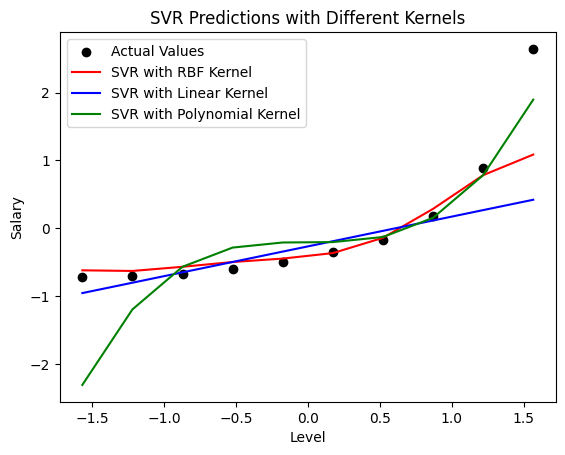

In [50]:
# Function to train SVR model and make predictions
def train_and_predict(kernel_type):
    svr_model = SVR(kernel=kernel_type)
    svr_model.fit(X, y.ravel())
    y_pred = svr_model.predict(X)
    return y_pred

# Predict using three different kernels: rbf, linear, polynomial
y_pred_rbf = train_and_predict('rbf')
y_pred_linear = train_and_predict('linear')
y_pred_poly = train_and_predict('poly')

# Plot the results
plt.scatter(X, y, color='black', label='Actual Values')
plt.plot(X, y_pred_rbf, color='red', label='SVR with RBF Kernel')
plt.plot(X, y_pred_linear, color='blue', label='SVR with Linear Kernel')
plt.plot(X, y_pred_poly, color='green', label='SVR with Polynomial Kernel')

plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('SVR Predictions with Different Kernels')
plt.legend()
plt.show()

#Decision Tree

A **Decision Tree** is a popular supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of input features, ultimately assigning a label or predicting a target variable for each observation. Decision Trees have several advantages, including simplicity, interpretability, and the ability to handle both numerical and categorical data. However, they can be sensitive to noise and outliers.

##<font color="red">**Question 3**</font>

- What is pruning in the context of Decision Trees? Why is it done, and how does it contribute to preventing overfitting?


<font color="green">**Answer:**</font>

Pruning in the context of Decision Trees refers to the process of removing specific branches or nodes from the tree to improve its performance, generalization ability, and prevent overfitting. Decision Trees have a tendency to grow excessively deep and capture noise or outliers in the training data, which can lead to poor performance on new, unseen data. Pruning helps to address this issue by reducing the complexity of the tree.

There are two main types of pruning: pre-pruning (early stopping) and post-pruning (pruning after the tree has been fully grown).

1. **Pre-pruning (Early Stopping):**
   - In pre-pruning, the tree-growing process is stopped before it becomes too complex.
   - This can be achieved by setting a threshold on various criteria during the tree-building process. For example, you might limit the maximum depth of the tree, set a minimum number of samples required to split a node, or impose a minimum impurity improvement for a split to occur.
   - By stopping the tree from growing too deep or becoming too complex, pre-pruning helps prevent the model from fitting the training data too closely and capturing noise.

2. **Post-pruning:**
   - Post-pruning involves growing the tree to its maximum depth and then removing or collapsing nodes that do not contribute significantly to improving the model's performance.
   - Common post-pruning techniques include cost-complexity pruning (also known as weakest link pruning) and reduced-error pruning.
   - Cost-complexity pruning involves assigning a cost to each subtree based on a complexity parameter, and subtrees with higher costs (less improvement in impurity) are pruned.
   - Reduced-error pruning involves evaluating the performance of the tree on a validation set and removing nodes that do not contribute significantly to reducing classification errors.

**Benefits of Pruning:**
   - **Generalization:** Pruning helps the model generalize better to new, unseen data by preventing it from memorizing the noise and specific details of the training set.
   - **Reduced Overfitting:** Overfitting occurs when a model learns the training data too well, capturing noise and outliers. Pruning reduces overfitting by simplifying the tree structure.
   - **Computational Efficiency:** Smaller trees resulting from pruning are computationally more efficient during both training and inference.



- How does the application of Decision Trees differ in regression tasks compared to classification tasks? What is predicted at the leaf nodes in regression?


<font color="green">**Answer:**</font>

Decision Trees can be applied to both regression and classification tasks, and while the underlying principles are similar, there are key differences in terms of the output and the interpretation of leaf nodes.

### Decision Trees in Classification Tasks:

1. **Output at Leaf Nodes:**
   - In classification tasks, each leaf node represents a specific class or category.
   - The majority class of the training instances that reach a particular leaf node is assigned as the predicted class for any new instance that follows the same path in the tree.

2. **Splitting Criteria:**
   - The splitting criteria for decision nodes are typically based on measures of impurity, such as Gini impurity or entropy, aiming to create pure nodes where most instances belong to the same class.

3. **Example:**
   - For example, in a Decision Tree for classifying whether an email is spam or not, the leaf nodes might represent the classes "Spam" or "Not Spam."

### Decision Trees in Regression Tasks:

1. **Output at Leaf Nodes:**
   - In regression tasks, the leaf nodes do not represent classes but instead contain a predicted continuous value.
   - The predicted value at a leaf node is usually the mean (or sometimes the median) of the target variable for the training instances that reached that leaf.

2. **Splitting Criteria:**
   - The splitting criteria for decision nodes in regression trees are based on reducing the variance of the target variable. Common measures include mean squared error or mean absolute error.

3. **Example:**
   - In a Decision Tree for predicting house prices based on features like square footage, number of bedrooms, etc., the leaf nodes would contain predicted house prices.

### Predicted Value in Regression Leaf Nodes:

The predicted value at a leaf node in a regression tree is determined by the training instances that end up in that node. For a given leaf node, the predicted value is often the average (mean) of the target variable for the training instances associated with that node. This means that when a new instance follows the decision tree path and reaches a particular leaf, the predicted value is the mean of the target variable for the training instances that share that leaf.

##<font color="red">**Question 4**</font>

In this question, you will work with the **Diabetes.csv** dataset to classify diabetics and non-diabetics.

- First, divide the data into the most and test data with a ratio of 7 to 3 and apply a decision tree on them. Report and compare accuracy for test and training data.

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [53]:
# Load the dataset
data = pd.read_csv("Diabetes.csv")
data.head()

,pregnant,glucose,BP,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
# Separate features (X) and target variable (y)
X = data.drop('label', axis=1)
y = data['label']

According to the question, we use 70% of data for training and %30 of data for testing:

In [55]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we can start model training! We computed accuracy on train and test data and we achieved %100 accuracy on train data and %70 test accuracy. It is obvious that we have overfitting problem in here:

In [56]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predictions on training data
train_predictions = dt_classifier.predict(X_train)

# Predictions on testing data
test_predictions = dt_classifier.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Display the accuracies
print(f"Accuracy on Training Data: {train_accuracy:.2f}")
print(f"Accuracy on Testing Data: {test_accuracy:.2f}")

Accuracy on Training Data: 1.00
Accuracy on Testing Data: 0.70


- Display the decision tree you created using the available libraries.

Here we can see a huge and complex tree that not all of its details is clear for us:

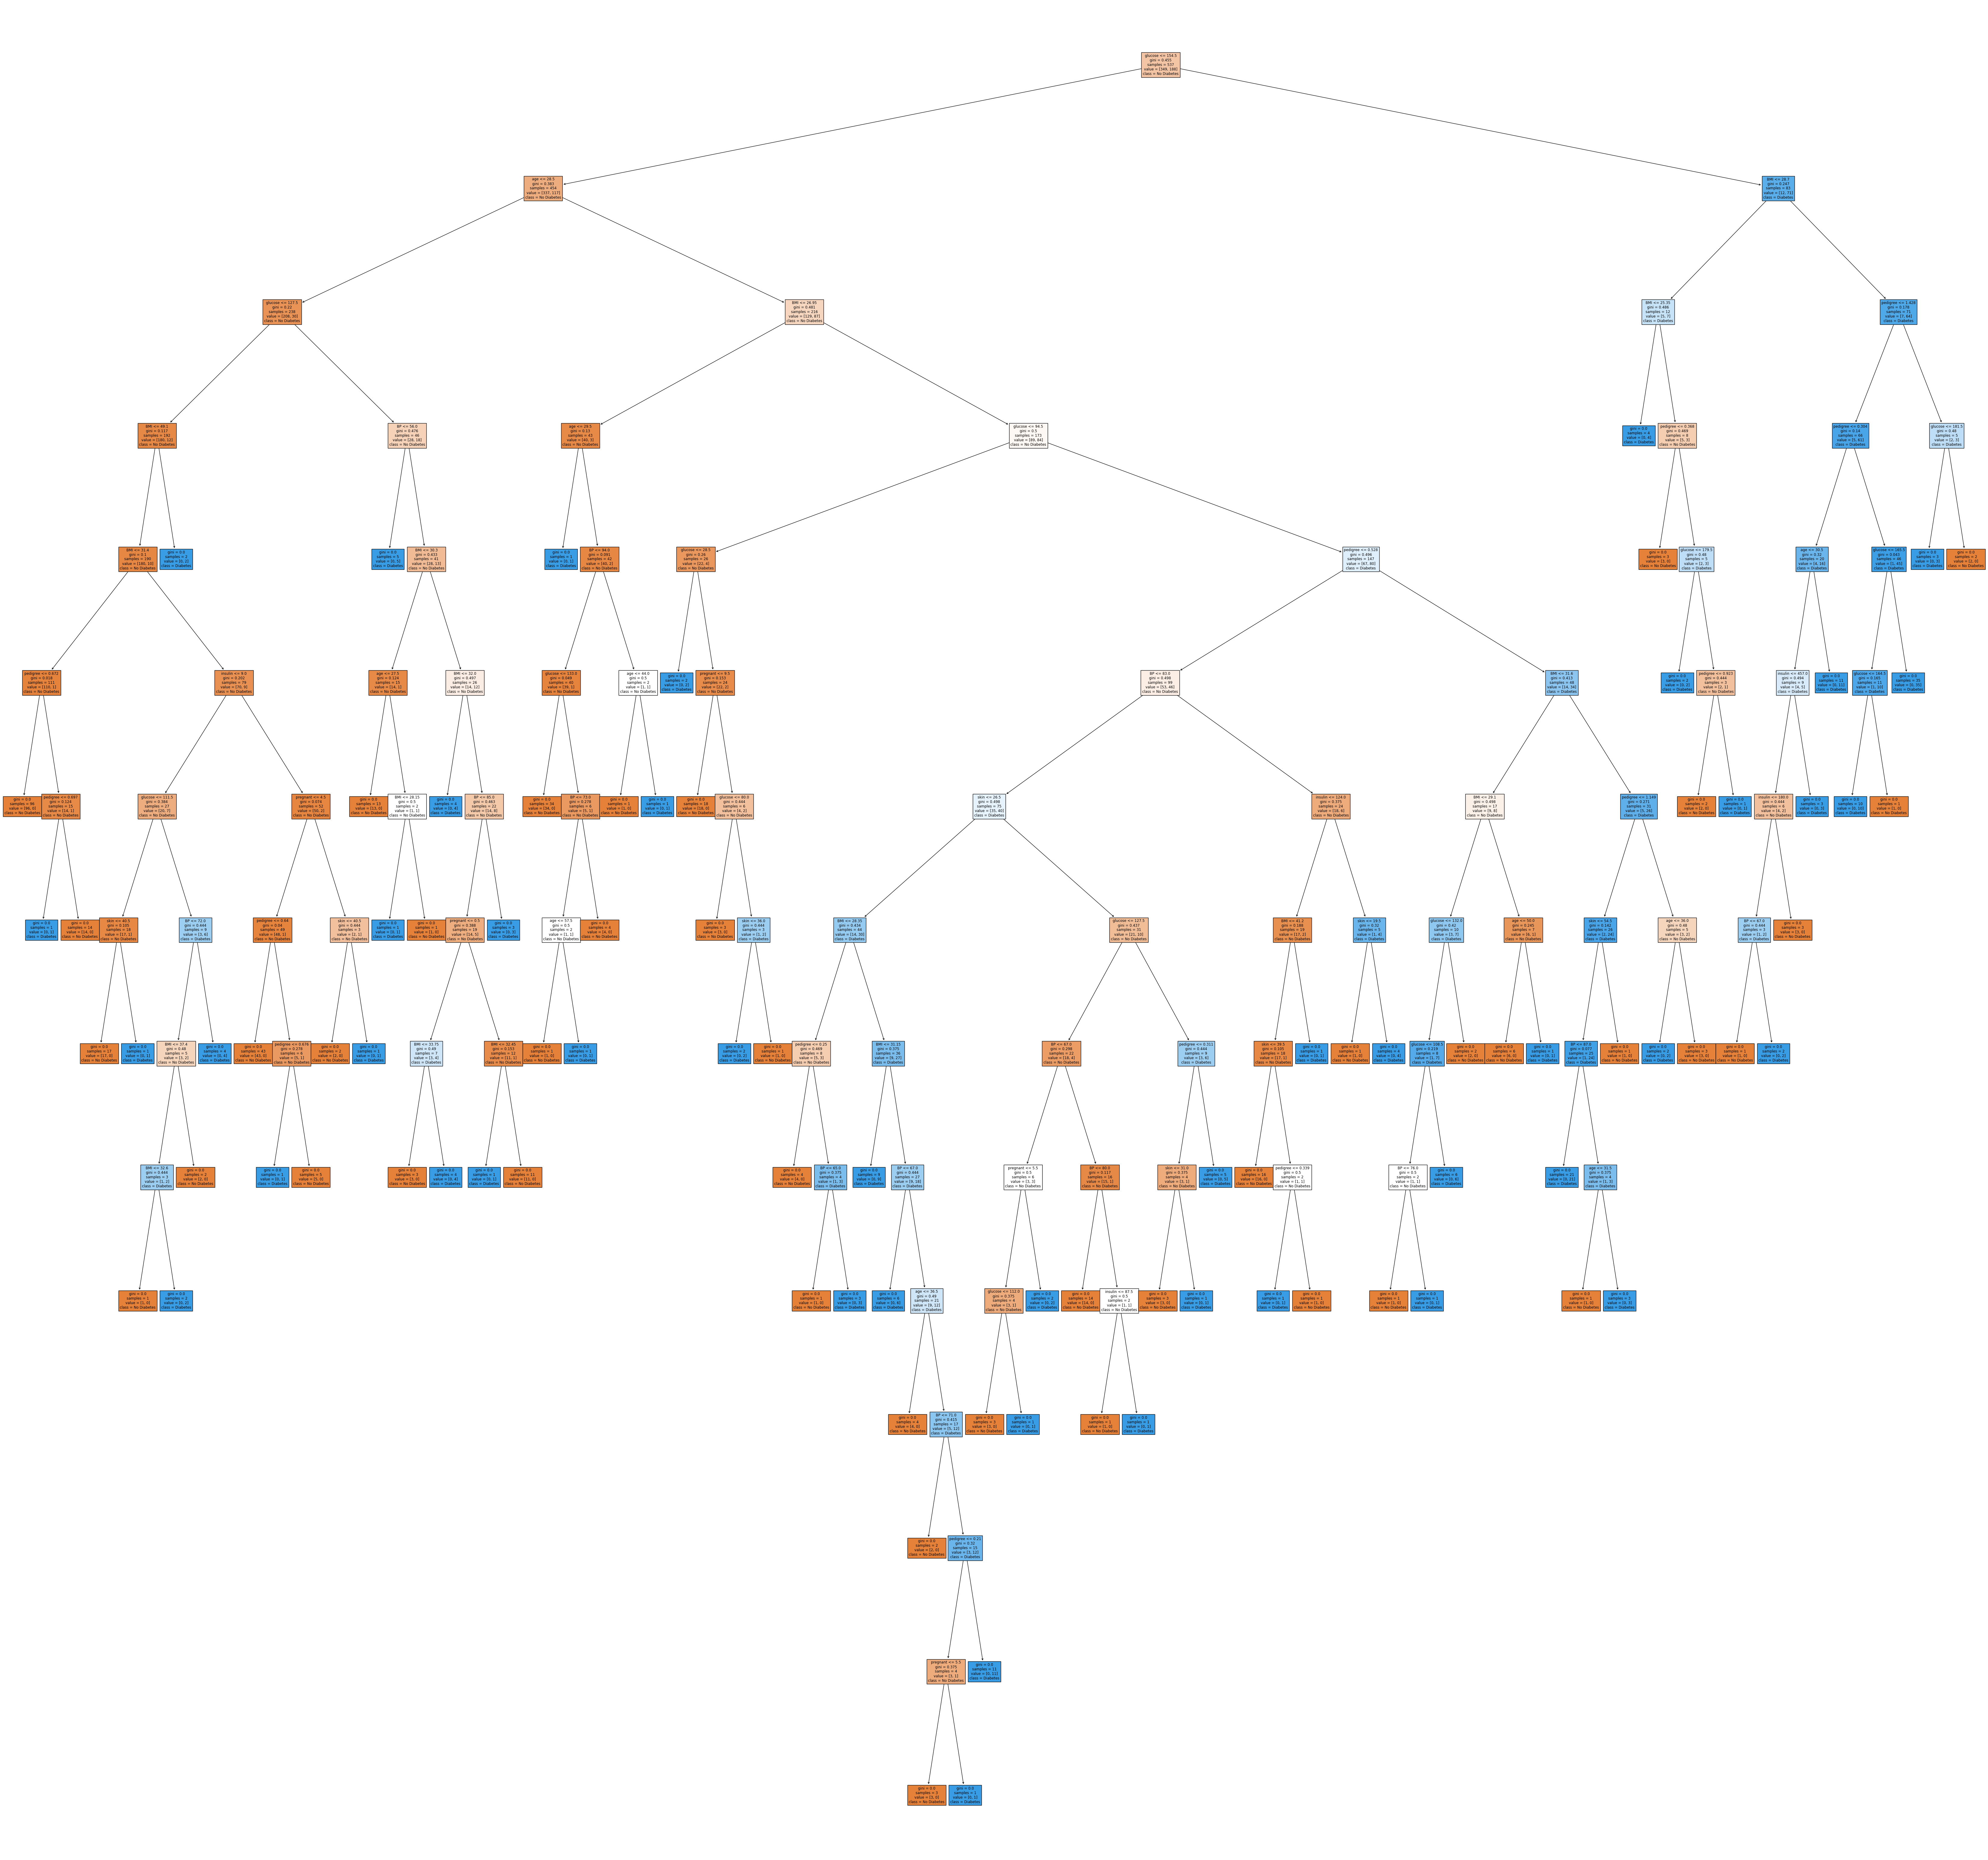

In [57]:
# Your Code:
# Visualize the decision tree
plt.figure(figsize=(85, 80))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

- Now design a tree whose maximum depth = 2. Compare the accuracy values for the test and training data reported with the results obtained in the first part.

With forcing tree to have depth = 2, we will have a simpler model. According to accuracy, we have a high decrease in train accuracy but we don't see any change in test accuracy. Now we don't have overfitting problem:

In [58]:
# Your Code:
# Initialize the Decision Tree classifier with max depth = 2
dt_classifier_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
dt_classifier_depth_2.fit(X_train, y_train)

# Predictions on testing data
test_predictions_depth_2 = dt_classifier_depth_2.predict(X_test)

# Calculate accuracy on testing data
test_accuracy_depth_2 = accuracy_score(y_test, test_predictions_depth_2)

# Display accuracy on testing data for depth=2
print(f"Accuracy on Testing Data (Max Depth = 2): {test_accuracy_depth_2:.2f}")

# Compare with the accuracy from the first part
print(f"Accuracy on Testing Data (Original Tree): {test_accuracy:.2f}")


Accuracy on Testing Data (Max Depth = 2): 0.72
Accuracy on Testing Data (Original Tree): 0.70


- Display the tree from the previous section and compare it with the results of section b in terms of interpretability.

The last tree was too complex to understand and interpret. But in this case we have a simple decision tree that we can easily find that with which feature and in what range, we could classify examples:

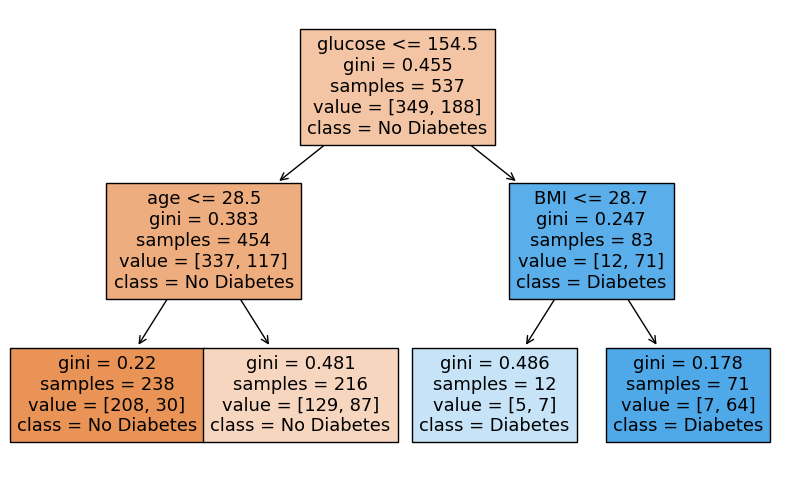

In [59]:
# Your Code:
# Visualize the decision tree with max depth = 2
plt.figure(figsize=(10, 6))
plot_tree(dt_classifier_depth_2, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


##<font color="red">**Question 5**</font>

In this problem, You deal with **OJ** dataset.

The orange juice (OJ) data set is about customer purchases for the Citrus Hill and Minute Maid brands of orange juice.

Target column is *Purchase*

In [60]:
!pip install ISLP

In [61]:
from ISLP import load_data
oj = load_data('OJ')

In [62]:
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


- Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [63]:
# Separate features (X) and target variable (y)
X = oj.drop('Purchase', axis=1)
y = oj['Purchase']

In [64]:
# Your Code:
from sklearn.model_selection import train_test_split
data_count = len(oj)
test_size = data_count - 800
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

- Fit a tree to the training data, with Purchase as the response and the other variables except for Buy as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate?

At first, we should define that what is error rate? In a classification problem, the error rate, also known as misclassification rate, is a measure of the number of misclassified instances (or data points) in the dataset, expressed as a fraction or percentage of the total number of instances. In other words, we can express error rate with the following formula:

$ErrorRate = 1 - Accuracy$

In [65]:
# Your Code:
from sklearn.tree import DecisionTreeClassifier
# Select predictors (exclude 'Buy' variable)
predictors = X_train.columns.difference(['Buy'])

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train[predictors], y_train)

# Prediction
train_predictions = dt_classifier.predict(X_train[predictors])

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Error Rate: {1 - train_accuracy}")

Training Error Rate: 0.1875


- Create a plot of the tree, and interpret the results.

To interpret the results, we considered a tree with shallow depth (depth=2). The key features according to this tree are **LoyalCH** and  **PriceDiff**:

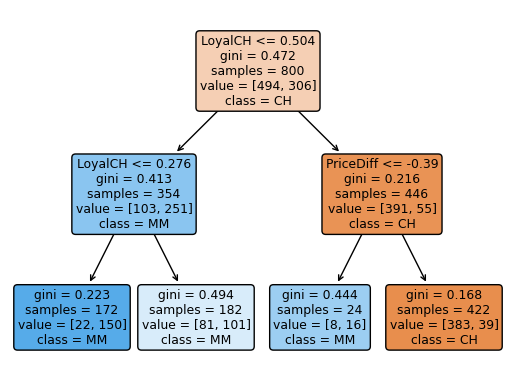

In [66]:
# Your Code:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure()
plot_tree(dt_classifier, feature_names=predictors, class_names=dt_classifier.classes_, filled=True, rounded=True)
plt.show()


- Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

The error rate on test set is %20. We have more mispredictions in MM class:

Test Error Rate: 0.20370370370370372


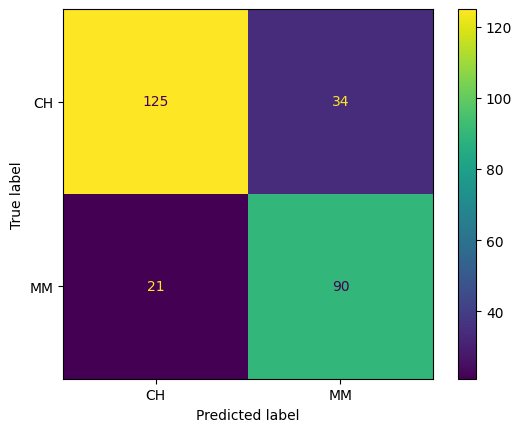

In [67]:
# Your Code:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

# Predictions on test data
test_predictions = dt_classifier.predict(X_test[predictors])

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Calculate test error rate
test_accuracy = accuracy_score(y_test, test_predictions)
test_error_rate = 1 - test_accuracy

# Display confusion matrix and test error rate
print(f"Test Error Rate: {test_error_rate}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dt_classifier.classes_)
disp.plot()

- determine the optimal tree size and best score.

To determine the best tree, we consider these parametrs:


*   Max depth of tree
*   Min Samples Split: The minimum number of samples a node must contain in order to consider splitting

According to the results, we will have best model when we set the max_depth=4 and  min_samples_split=2. The best accuracy score on this setting is 0.83.



In [68]:
# Your code:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train[predictors], y_train)

# Get the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the results
print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 2}
Best Accuracy Score: 0.83375
